# Clasificaciones de imagenes con InceptionV3

##BUILD ROBOCUP_2019 Dataset

###Dataset details
RoboCup Dataset contains 196195 images.

8 main parent categories that contain 180 children categories.

80% for train

20% for test


##Importar los paquetes

In [ ]:
from tensorflow import keras
import zipfile
import tensorflow as tf
import os
from google.colab import drive
import matplotlib.pyplot as plt


##InceptionV3 for subclass

###LoadData

In [ ]:
drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Mounted at /content/drive


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 299
NUM_CLASSES = 180

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


### Build model - InceptionV3

In [ ]:
base_model = keras.applications.InceptionV3(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

#Then, freeze the base model.
base_model.trainable = False

#Create a new model on top.
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(180, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()


87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 180)               368820    
                                                                 
Total params: 22,171,604
Trainable params: 368,820
Non-trainable params: 21,802,784
_________________________________________________________________


###Evaluate model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

model.compile(optimizer=keras.optimizers.Adam(),
                loss="categorical_crossentropy", 
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches, callbacks=[callback])

Epoch 1/20
4908/4908 [==============================] - 1015s 204ms/step - loss: 4.9348 - accuracy: 0.1355 - top_5_accuracy: 0.3326 - precision: 0.2532 - val_loss: 4.1607 - val_accuracy: 0.2121 - val_top_5_accuracy: 0.4969 - val_precision: 0.3028
Epoch 2/20
4908/4908 [==============================] - 974s 199ms/step - loss: 4.2696 - accuracy: 0.2205 - top_5_accuracy: 0.4940 - precision: 0.3115 - val_loss: 3.5282 - val_accuracy: 0.2734 - val_top_5_accuracy: 0.5922 - val_precision: 0.3825
Epoch 3/20
4908/4908 [==============================] - 947s 193ms/step - loss: 4.1403 - accuracy: 0.2392 - top_5_accuracy: 0.5332 - precision: 0.3215 - val_loss: 3.7510 - val_accuracy: 0.2808 - val_top_5_accuracy: 0.5845 - val_precision: 0.3837
Epoch 4/20
4908/4908 [==============================] - 1002s 204ms/step - loss: 4.0013 - accuracy: 0.2651 - top_5_accuracy: 0.5607 - precision: 0.3487 - val_loss: 3.4194 - val_accuracy: 0.3220 - val_top_5_accuracy: 0.6227 - val_precision: 0.4270
Epoch 5/20
490

###print results

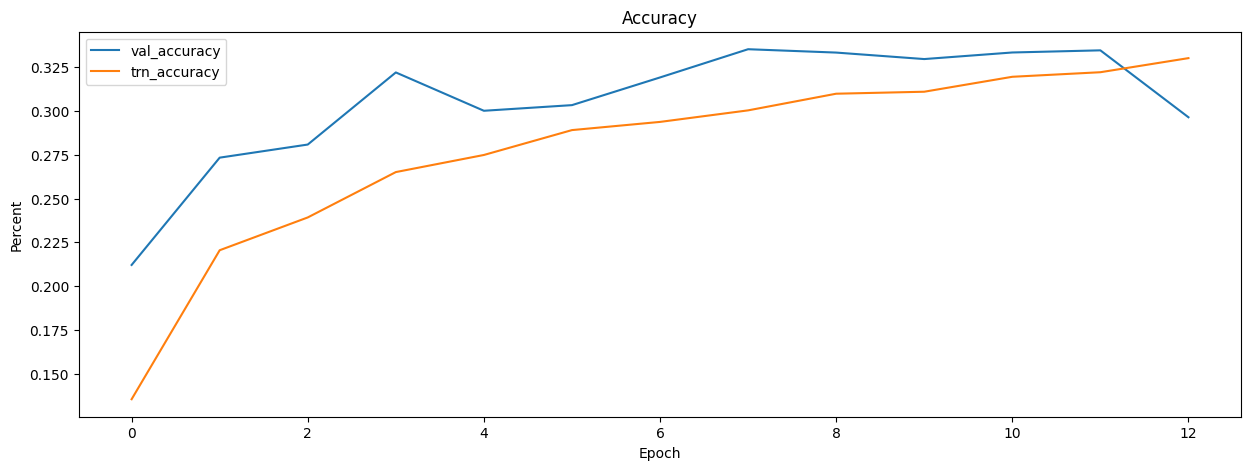

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

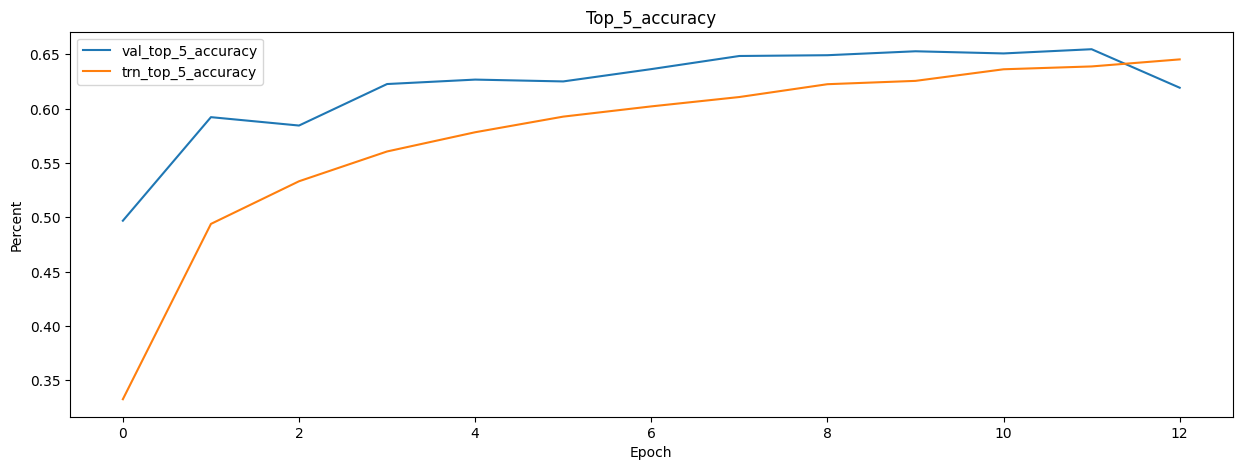

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

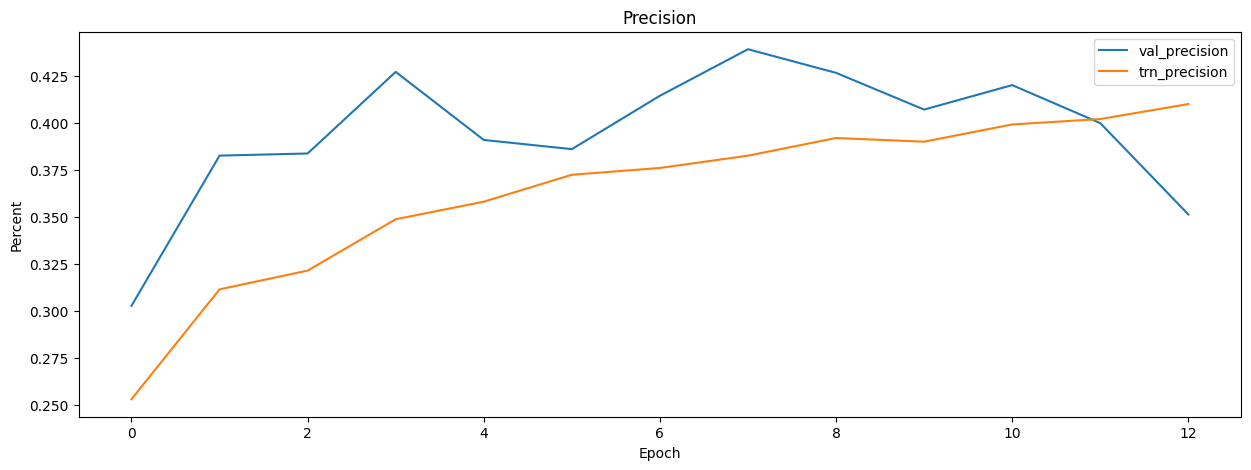

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/InceptionV3Model')

## InceptionV3 for Superclass

###Load super class data

In [ ]:
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

### Create the model
 whose weights are generated in the previous step, when training with the fine classes.

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 299
NUM_CLASSES = 8

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/InceptionV3Model')
# Agregar una nueva capa de salida personalizada
new_output_layer = keras.layers.Dense(NUM_CLASSES, activation='softmax', name='superClass')(model.layers[-1].output)

# Crear un nuevo modelo con la capa de salida personalizada
model = keras.models.Model(inputs=model.input, outputs=new_output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 180)               368820    
                                                                 
 superClass (Dense)          (None, 8)                 1448      
                                                                 
Total params: 22,173,052
Trainable params: 370,268
Non-trainable params: 21,802,784
_________________________________________

### Evaluate model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

model.compile(optimizer=keras.optimizers.Adam(),
                loss="categorical_crossentropy", 
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches, callbacks=[callback])

Epoch 1/20
4859/4859 [==============================] - 948s 194ms/step - loss: 1.4475 - accuracy: 0.6675 - top_5_accuracy: 0.9368 - precision: 0.8323 - val_loss: 1.2597 - val_accuracy: 0.6399 - val_top_5_accuracy: 0.9396 - val_precision: 0.7810
Epoch 2/20
4859/4859 [==============================] - 941s 194ms/step - loss: 1.0225 - accuracy: 0.7202 - top_5_accuracy: 0.9546 - precision: 0.7926 - val_loss: 1.2743 - val_accuracy: 0.5998 - val_top_5_accuracy: 0.9294 - val_precision: 0.6522
Epoch 3/20
4859/4859 [==============================] - 936s 193ms/step - loss: 0.9388 - accuracy: 0.7311 - top_5_accuracy: 0.9567 - precision: 0.7876 - val_loss: 1.2156 - val_accuracy: 0.6179 - val_top_5_accuracy: 0.9394 - val_precision: 0.6711
Epoch 4/20
4859/4859 [==============================] - 898s 185ms/step - loss: 0.9069 - accuracy: 0.7371 - top_5_accuracy: 0.9586 - precision: 0.7969 - val_loss: 1.1777 - val_accuracy: 0.6248 - val_top_5_accuracy: 0.9402 - val_precision: 0.7413
Epoch 5/20
4859/

###print results

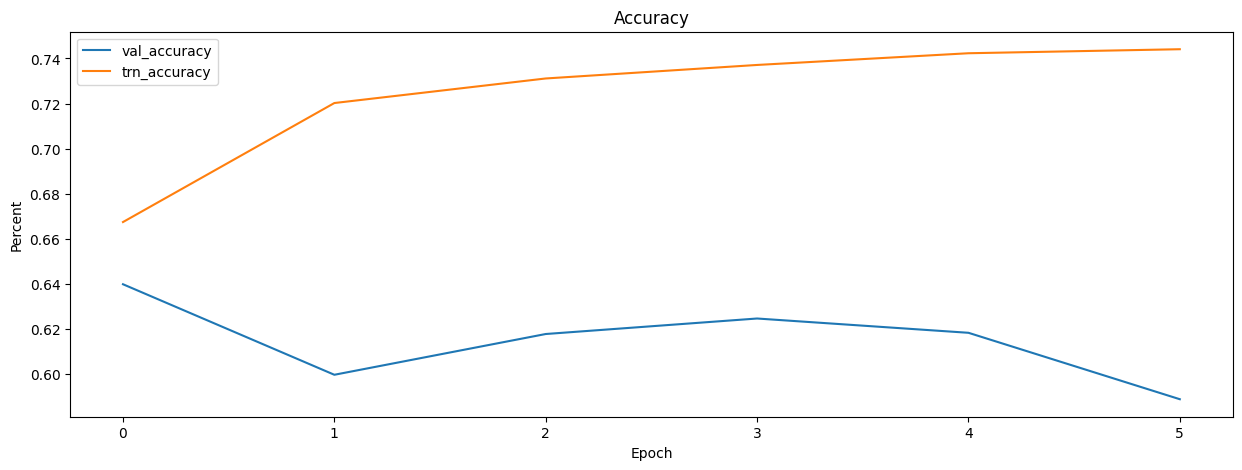

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

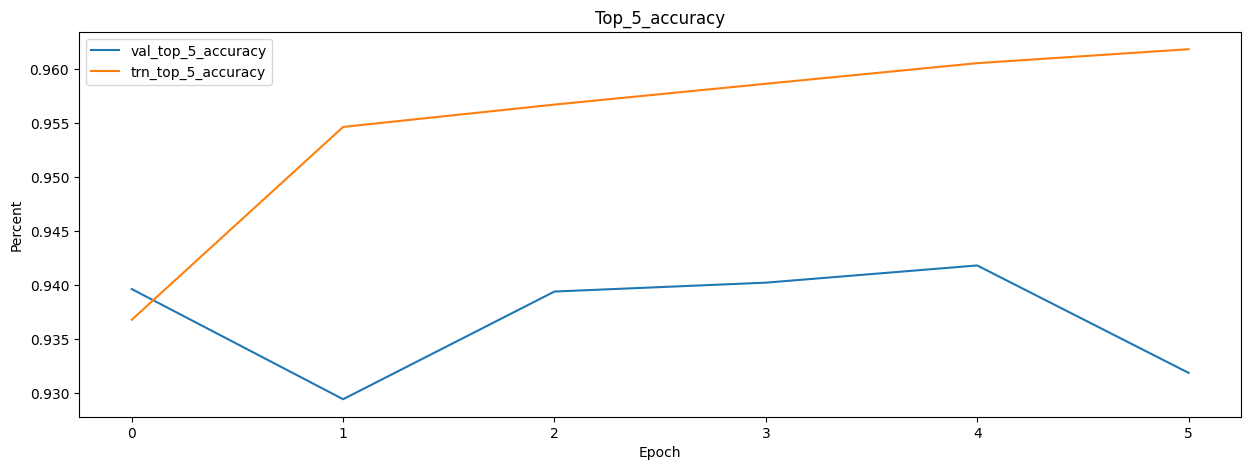

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

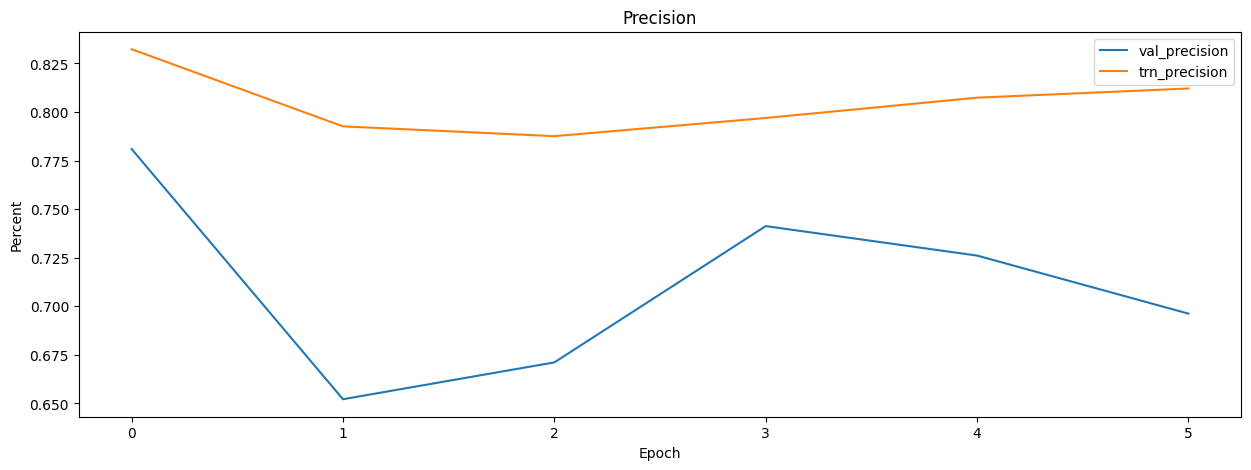

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/InceptionV3Model_superClass')

##Fine-tuning subClass

###Load data

In [ ]:
drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Mounted at /content/drive


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 299
NUM_CLASSES = 180

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


###Load model previous

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/InceptionV3Model')
model.trainable=True
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 180)               368820    
                                                                 
Total params: 22,171,604
Trainable params: 22,137,172
Non-trainable params: 34,432
_________________________________________________________________


###Evaluate model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

model.compile(optimizer=keras.optimizers.Adam(1e-5),
                loss="categorical_crossentropy", 
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches, callbacks=[callback])

Epoch 1/20
4908/4908 [==============================] - 2399s 477ms/step - loss: 2.1820 - accuracy: 0.4436 - top_5_accuracy: 0.7524 - precision: 0.6984 - val_loss: 1.9778 - val_accuracy: 0.4831 - val_top_5_accuracy: 0.7857 - val_precision: 0.7394
Epoch 2/20
4908/4908 [==============================] - 2311s 471ms/step - loss: 1.8758 - accuracy: 0.5051 - top_5_accuracy: 0.8045 - precision: 0.7407 - val_loss: 1.9287 - val_accuracy: 0.4961 - val_top_5_accuracy: 0.7993 - val_precision: 0.7117
Epoch 3/20
4908/4908 [==============================] - 2322s 473ms/step - loss: 1.6439 - accuracy: 0.5558 - top_5_accuracy: 0.8413 - precision: 0.7712 - val_loss: 1.8626 - val_accuracy: 0.5168 - val_top_5_accuracy: 0.8086 - val_precision: 0.7223
Epoch 4/20
4908/4908 [==============================] - 2325s 474ms/step - loss: 1.4226 - accuracy: 0.6084 - top_5_accuracy: 0.8740 - precision: 0.7985 - val_loss: 1.8737 - val_accuracy: 0.5240 - val_top_5_accuracy: 0.8124 - val_precision: 0.7088
Epoch 5/20
4

###print results

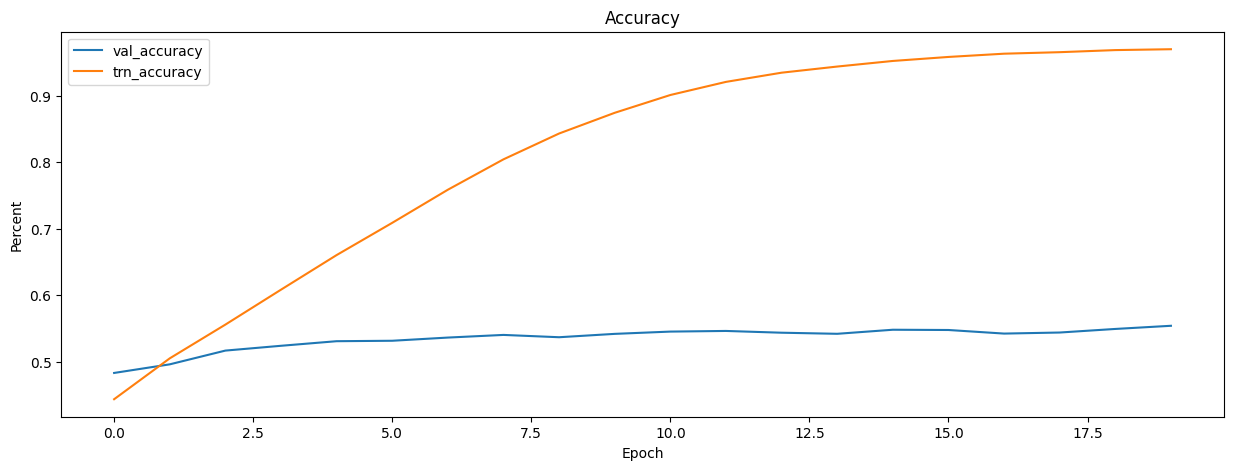

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

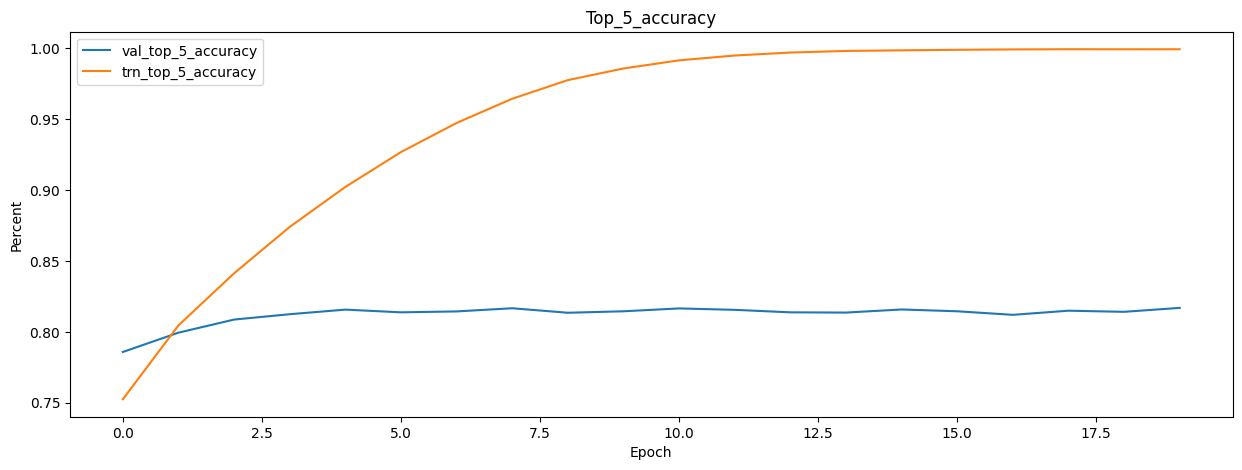

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

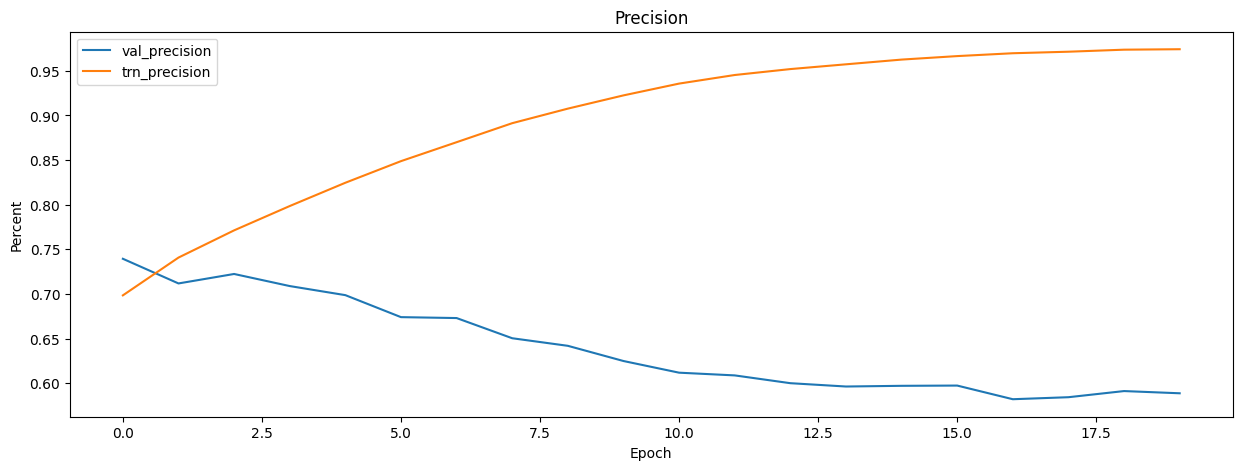

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/InceptionV3Model_fineTuning')

##Fine-tuning superClass

###Load data

In [ ]:
#drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 299
NUM_CLASSES = 8

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


###Load model previous

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_models/InceptionV3Model_superClass')
model.trainable=True
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 180)               368820    
                                                                 
 superClass (Dense)          (None, 8)                 1448      
                                                                 
Total params: 22,173,052
Trainable params: 22,138,620
Non-trainable params: 34,432
__________________________________________

###Evaluate model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

model.compile(optimizer=keras.optimizers.Adam(1e-5),
                loss="categorical_crossentropy", 
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches, callbacks=[callback])


Epoch 1/20
4859/4859 [==============================] - 2363s 479ms/step - loss: 0.8087 - accuracy: 0.7573 - top_5_accuracy: 0.9689 - precision: 0.8360 - val_loss: 1.0310 - val_accuracy: 0.6644 - val_top_5_accuracy: 0.9584 - val_precision: 0.7701
Epoch 2/20
4859/4859 [==============================] - 2322s 478ms/step - loss: 0.6907 - accuracy: 0.8005 - top_5_accuracy: 0.9756 - precision: 0.8724 - val_loss: 1.0311 - val_accuracy: 0.6697 - val_top_5_accuracy: 0.9539 - val_precision: 0.7625
Epoch 3/20
4859/4859 [==============================] - 2314s 476ms/step - loss: 0.6074 - accuracy: 0.8326 - top_5_accuracy: 0.9797 - precision: 0.8929 - val_loss: 1.0556 - val_accuracy: 0.6572 - val_top_5_accuracy: 0.9517 - val_precision: 0.7560
Epoch 4/20
4859/4859 [==============================] - 2313s 476ms/step - loss: 0.5434 - accuracy: 0.8563 - top_5_accuracy: 0.9828 - precision: 0.9077 - val_loss: 1.0229 - val_accuracy: 0.6810 - val_top_5_accuracy: 0.9544 - val_precision: 0.7611
Epoch 5/20
4

###print results

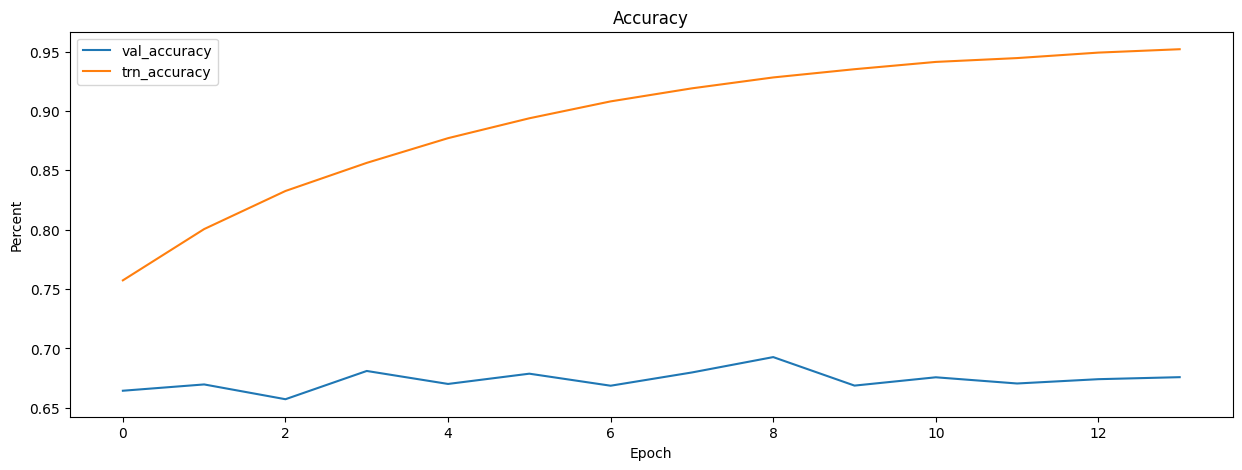

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

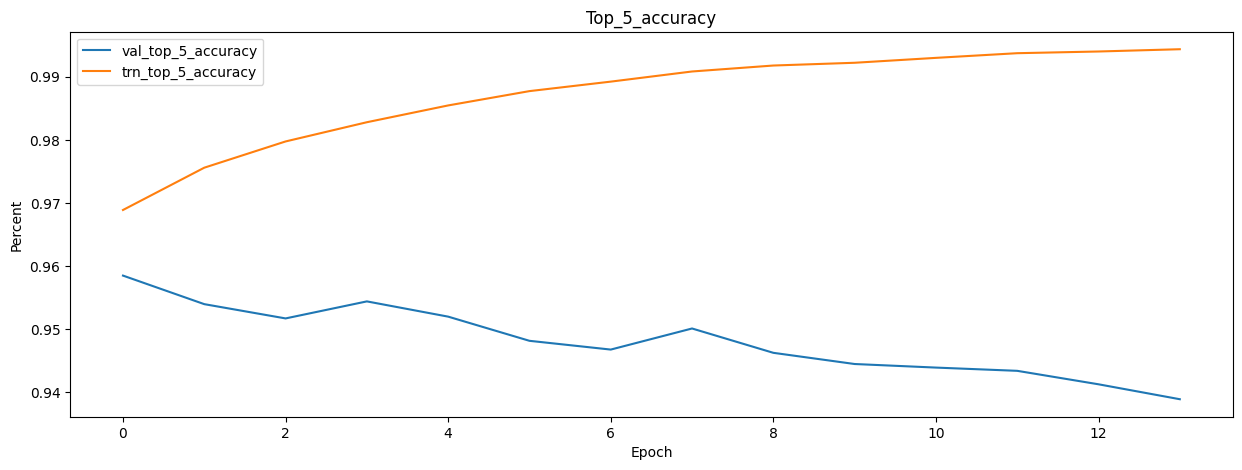

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

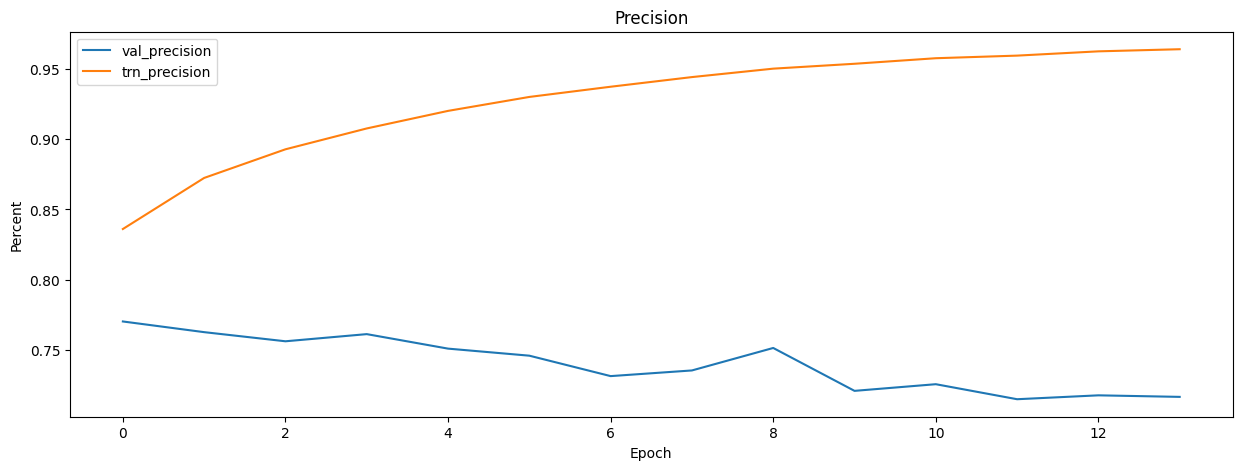

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend(); 
plt.show()

###save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/InceptionV3Model_superClass_fineTuning')

In [ ]:
from google.colab import runtime 
runtime.unassign

<function google.colab.runtime.unassign()>